# A Simulated Dataset of a Real-World Phenomenom

## Introduction

The real-world phenomenom that I will be looking at is the relationship between obesity and increased mortaility. Obesity grades 2 and 3 (BMI >/= 35) is associated with an aproximate 30% increase in all-cause mortality https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/. 

This dataset can be used to predict the number of people in a population that will suffer from obesity and therefore an increase in all-cause mortality.



## Investigation
Variables to look at:
Sex (What is the proportion of males to females?)
Weight (Average weight by sex and the standard deviation)
Height (Average height and standard deviation)
BMI 
BMI Category 
Risk of all-cause mortality

For sex, there are different average weights and heights for males and females.

We'll start by importing some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Sex ratio

The ratio of males to females in Ireland are:
Aged 15 to 24: 301,114 males and 292,055 females (1.03 m/f)
Aged 25 to 54: 1,087,587 males and 1,077,383 females (1.01 m/f)
Aged 55 to 64: 261,650 males and 260,737 females (1 m/f)

(Reference - https://www.indexmundi.com/ireland/demographics_profile.html)

In [2]:
# Number of males and females in Ireland aged 15 to 64 years old
males = 301114 + 1087587 + 261650
females = 292055 + 1077383 + 260737

# Total number of adults in Ireland aged 15 to 64 years old
total = males + females

print(f"The number of males aged 15 to 64 in Ireland is {males}")
print(f"The number of females aged 15 to 64 in Ireland is {females}")
print(f"The total number of males and females aged 15 to 64 in Ireland is {total}")
      

The number of males aged 15 to 64 in Ireland is 1650351
The number of females aged 15 to 64 in Ireland is 1630175
The total number of males and females aged 15 to 64 in Ireland is 3280526


In [3]:
# Ratio of males to females in Ireland aged 15 to 64

ratioOfMales = males/ total
ratioOfFemales = females/ total

print(ratioOfMales)
print(ratioOfFemales)

0.5030751166123969
0.4969248833876031


The figures below for weight and height are for 18 to 64 year olds. Here an assumption will be made that the ratio for males to females in Ireland aged 18 to 64 year olds will be the same as 15 to 64 year olds. However, as can be seen from the ratios above, the number of males to females decreases as age increases (1.03 for 15 to 24 year olds, 1.01 for 25 to 54 and 1.00 55 to 64 years).

We can now create a random sample of 1000 people which will have the same ratio of males to females as was found above

In [4]:
# Creating a 1D array with male and female as the elements

sex =["male", "female"]

sampleSize = 1000

sexArray = np.random.choice(sex, sampleSize, p=[ratioOfMales, ratioOfFemales])

np.unique(sexArray, return_counts=True)

(array(['female', 'male'],
       dtype='<U6'), array([481, 519], dtype=int64))

### Weight

Mean adult (18 to 64 years old) male body weight is 86.2 kg with a standard deviation of 15.0 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

Mean adult (18 to 64 years old) female bodyweight is 70.0 kg with a standard deviation of 13.7 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [5]:
# Assigning variables for weight

meanMaleWeight, maleWeightSD = 86.2, 15.0
meanFemaleWeight, femaleWeightSD = 70.0, 13.7

The median values for males and females are 85.1 kg and 67.5 kg respectively. The distributions for weight for males and females are therefore are both positively skewed. We can also see this by examining the 5th and 95th percentiles. For males these are 64.0 kg and 112.6 kg, respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). For females, these are 52.2 kg and 96.3 kg respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). 

The differences between these and their respective medians can be calculated as follows:

In [6]:
# Assigning median, 5th perentile and 95th percentiles

maleMedian, male5th, male95th = 85.1, 64.0, 112.6
femaleMedian, female5th, female95th = 67.5, 52.2, 96.3

# Calculating difference between medians and 5th and 95th percentiles
male5thdiff = maleMedian - male5th
male95thdiff = male95th - maleMedian

female5thdiff = femaleMedian - female5th
female95thdiff = female95th - femaleMedian

print(f"The difference between the median body weight for males and the 5th and 95th percentiles are:")
print(f"5th percentile: {male5thdiff}")
print(f"95th percentile: {male95thdiff}")

print(f"The difference between the median body weight for females and the 5th and 95th percentiles are:")
print(f"5th percentile: {female5thdiff}")
print(f"95th percentile: {female95thdiff}")

The difference between the median body weight for males and the 5th and 95th percentiles are:
5th percentile: 21.099999999999994
95th percentile: 27.5
The difference between the median body weight for females and the 5th and 95th percentiles are:
5th percentile: 15.299999999999997
95th percentile: 28.799999999999997


This also shows that body weight is not normally distributed but is instead positively skewed.

A study of German, Norwegian and Austrian conscripts also found that body weight is not normally distributed. 

(Reference - https://www.ncbi.nlm.nih.gov/pubmed/11673780)

There may be a diproportionately larger number of obese people than underweight (therefore leading to the positive skewness) due to the fact that the more a person weighs the easier it then is for them to gain even more weight. (Reference - https://www.researchgate.net/publication/7006581_The_Changing_Shape_of_the_Body_Mass_Index_Distribution_Curve_in_the_Population_Implications_for_Public_Health_Policy_to_Reduce_the_Prevalence_of_Adult_Obesity)

Firstly we will create a normal distribution for male and female weights

(array([   2.,   10.,   62.,  134.,  209.,  261.,  173.,  110.,   29.,   10.]),
 array([  34.31907155,   44.06825408,   53.81743662,   63.56661915,
          73.31580168,   83.06498422,   92.81416675,  102.56334928,
         112.31253182,  122.06171435,  131.81089688]),
 <a list of 10 Patch objects>)

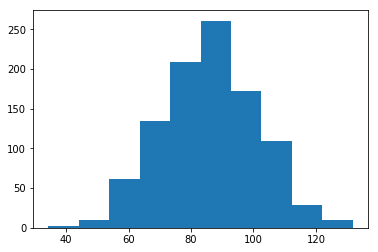

In [7]:
# Creating a random Normally distributed array for male weight
maleWeightDist = np.random.normal(meanMaleWeight, maleWeightSD, 1000)

# Displaying the male weights on a histogram
plt.hist(maleWeightDist)

From above in the https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf it was found that the male 5th and 95th percentiles were 64.0 and 112.6 respectively. We can view what these values are for the normally distributed male weight distribution:

In [8]:
# Assigning the 5th percentile for normally distributed male weight
five = np.percentile(maleWeightDist, 5)

# Assigning the 95th percentile for normally distributed male weight
ninetyFive = np.percentile(maleWeightDist, 95)

# Printing the 5th and 95th percentiles for normally distributed male weight
print(f"The 5th percentile is: {five}")
print(f"The 95th percentile is: {ninetyFive}")

The 5th percentile is: 61.21310486405185
The 95th percentile is: 110.82420901706145


As would be expected, the results are lower than the positively skewed real values. 

(array([  11.,   42.,  117.,  189.,  233.,  204.,  128.,   52.,   19.,    5.]),
 array([  34.1367995 ,   41.91037591,   49.68395232,   57.45752873,
          65.23110515,   73.00468156,   80.77825797,   88.55183438,
          96.32541079,  104.0989872 ,  111.87256361]),
 <a list of 10 Patch objects>)

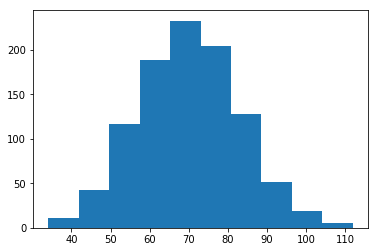

In [9]:
# Creating a random Normally distributed array for female weight
femaleWeightDist = np.random.normal(meanFemaleWeight, femaleWeightSD, 1000)

# Displaying the female weights on a histogram
plt.hist(femaleWeightDist)

We can create a positively skewed distribution using the following code:

In [10]:
# Importing the skewnorm function from scipy.stats 
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm 
from scipy.stats import skewnorm

# Creating a skewed normal distribution for male weight with a skewness factor of 0.1
maleWeightSkewedDist = skewnorm.rvs(0.1, loc=meanMaleWeight, scale=maleWeightSD, size=1000)

# Assigning the 5th percentile for normally distributed male weight with a skewness parameter of 0.1
five = np.percentile(maleWeightSkewedDist, 5)
# Assigning the 95th percentile for normally distributed male weight with a skewness parameter of 0.1
ninetyFive = np.percentile(maleWeightSkewedDist, 95)

print(f"The 5th percentile is: {five}")
print(f"The 95th percentile is: {ninetyFive}")

The 5th percentile is: 63.04020735627838
The 95th percentile is: 112.39473792339189


(array([  10.,   44.,  102.,  203.,  225.,  218.,  132.,   51.,   12.,    3.]),
 array([  45.08524024,   54.43918712,   63.79313401,   73.14708089,
          82.50102778,   91.85497466,  101.20892155,  110.56286844,
         119.91681532,  129.27076221,  138.62470909]),
 <a list of 10 Patch objects>)

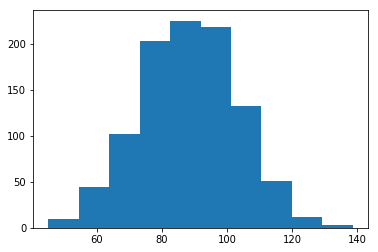

In [11]:
plt.hist(maleWeightSkewedDist)

### Height

Human height is normally distributed (Ref - https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/). The reason for this is that there are many genetic and envirnomental factors that are involved in height which leads to the large variation (Ref https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/).

Mean adult (18 to 64 years old) male height is 1.77 m with a standard deviation of 0.07 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)
Mean adult (18 to 64 years old) female height is 1.63 m with a standard deviation of 0.06 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [12]:
# Setting height variables

maleHeight, femaleHeight = 1.77, 1.63
maleHeightSD, femaleHeightSD = 0.07, 0.06

(array([   8.,   30.,   81.,  136.,  212.,  222.,  176.,   85.,   39.,   11.]),
 array([ 1.45736743,  1.49116421,  1.52496098,  1.55875776,  1.59255453,
         1.62635131,  1.66014809,  1.69394486,  1.72774164,  1.76153841,
         1.79533519]),
 <a list of 10 Patch objects>)

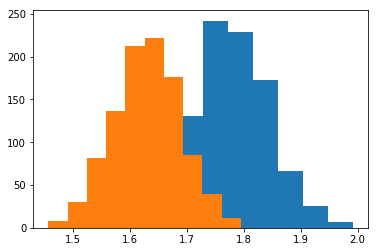

In [13]:
# Creating height distributions
maleHeightDist = np.random.normal(maleHeight, maleHeightSD, 1000)
femaleHeightDist = np.random.normal(femaleHeight, femaleHeightSD, 1000)

# Plotting distributions on a histogram
plt.hist(maleHeightDist)
plt.hist(femaleHeightDist)

Percentage in ireland with obesity

https://www.safefood.eu/SafeFood/media/SafeFoodLibrary/Documents/Professional/Nutrition/Adult-and-children-obesity-trends-ROI.pdf



## Simulating the Dataset

## Conclusion